In [3]:
import urllib.request
import nrel
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point, Polygon
from shapely import wkt

In [4]:
# requires geopandas 0.5 or higher
# conda install -c conda-forge geopandas 
import geopandas as gpd

In [5]:
# requires descartes to display world map
# conda install -c conda-forge descartes
import descartes

In [6]:
# Plot settings
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,15)

In [7]:
datafile = 'nrel_data.json'

In [8]:
with open(datafile, 'w') as write_file:
    with urllib.request.urlopen('https://developer.nrel.gov/api/alt-fuel-stations/v1.json?access=public&fuel_type=ELEC&country=CA&api_key=' + nrel.nrel_api['api_key'] + '&format=JSON') as url:
        data = json.loads(url.read().decode())
        json.dump(data, write_file)

In [9]:
write_file.close()

In [10]:
data = json.load(open(datafile))

In [11]:
df = pd.DataFrame(data["fuel_stations"])

In [12]:
df.shape

(4654, 62)

In [13]:
df.head()

,access_code,access_days_time,access_days_time_fr,access_detail_code,bd_blends,bd_blends_fr,cards_accepted,city,cng_dispenser_num,cng_fill_type_code,...,open_date,owner_type_code,plus4,state,station_name,station_phone,status_code,street_address,updated_at,zip
0,public,24 hours daily,Accessible 24 heures par jour,None,None,None,None,Repentigny,None,None,...,None,P,None,QC,Petro-Canada,450-654-0707,T,260 boul Louis-Philippe-Picard,2019-05-14T21:16:45Z,J5Y 0K8
1,public,24 hours daily,Accessible 24 heures par jour,None,None,None,None,Brooks,None,None,...,2017-02-01,P,None,AB,Ramada,403-362-6440,E,1319 2nd St W,2019-05-14T21:16:45Z,T1R 1P7
2,public,Dealership business hours,Heures dâ€™ouverture du concessionnaire,None,None,None,None,Airdrie,None,None,...,2015-01-15,P,None,AB,Davis Chevrolet,888-749-6505,E,149 E Lake Cres NE,2019-05-14T21:16:45Z,T4A 2H9
3,public,Dealership business hours,Heures dâ€™ouverture du concessionnaire,CALL,None,None,None,Edmonton,None,None,...,2018-05-23,P,None,AB,Go Nissan South,877-706-0192,E,1275 101 St SW,2019-05-14T21:16:45Z,T6X 1A1
4,public,Dealership business hours,Heures dâ€™ouverture du concessionnaire,CALL,None,None,None,Edmonton,None,None,...,2016-02-15,P,None,AB,Don Wheaton Chevrolet,780-431-5530,E,10727 - 82 Ave,2019-05-14T21:16:45Z,T6E 2B1


In [14]:
df.columns

Index(['access_code', 'access_days_time', 'access_days_time_fr',
       'access_detail_code', 'bd_blends', 'bd_blends_fr', 'cards_accepted',
       'city', 'cng_dispenser_num', 'cng_fill_type_code', 'cng_psi',
       'cng_renewable_source', 'cng_total_compression', 'cng_total_storage',
       'cng_vehicle_class', 'country', 'date_last_confirmed',
       'e85_blender_pump', 'e85_other_ethanol_blends', 'ev_connector_types',
       'ev_dc_fast_num', 'ev_level1_evse_num', 'ev_level2_evse_num',
       'ev_network', 'ev_network_ids', 'ev_network_web', 'ev_other_evse',
       'ev_pricing', 'ev_pricing_fr', 'ev_renewable_source', 'expected_date',
       'facility_type', 'fuel_type_code', 'geocode_status',
       'groups_with_access_code', 'groups_with_access_code_fr', 'hy_is_retail',
       'hy_pressures', 'hy_standards', 'hy_status_link', 'id',
       'intersection_directions', 'intersection_directions_fr', 'latitude',
       'lng_renewable_source', 'lng_vehicle_class', 'longitude',
       'l

In [15]:
df = df.drop(columns=['access_days_time_fr', 'access_detail_code', 'bd_blends', 'bd_blends_fr', 'cards_accepted','cng_dispenser_num', 'cng_fill_type_code', 'cng_psi', 'cng_renewable_source', 'cng_total_compression', 'cng_total_storage', 'cng_vehicle_class', 'e85_blender_pump', 'e85_other_ethanol_blends', 'ev_connector_types','ev_dc_fast_num', 'ev_level1_evse_num', 'ev_level2_evse_num','ev_network', 'ev_network_ids', 'ev_network_web', 'ev_other_evse','ev_pricing', 'ev_pricing_fr', 'ev_renewable_source','groups_with_access_code', 'groups_with_access_code_fr', 'hy_is_retail','hy_pressures', 'hy_standards', 'hy_status_link', 'id', 'intersection_directions', 'intersection_directions_fr', 'lng_renewable_source', 'lng_vehicle_class', 'lpg_nozzle_types', 'lpg_primary', 'ng_fill_type_code', 'ng_psi', 'ng_vehicle_class', 'owner_type_code', 'plus4', 'state', 'station_phone'], axis=1)

In [16]:
df.head()

,access_code,access_days_time,city,country,date_last_confirmed,expected_date,facility_type,fuel_type_code,geocode_status,latitude,longitude,open_date,station_name,status_code,street_address,updated_at,zip
0,public,24 hours daily,Repentigny,CA,2019-02-13,None,GAS_STATION,ELEC,200-9,45.789935,-73.408649,None,Petro-Canada,T,260 boul Louis-Philippe-Picard,2019-05-14T21:16:45Z,J5Y 0K8
1,public,24 hours daily,Brooks,CA,2018-12-11,None,HOTEL,ELEC,200-9,50.585242,-111.898615,2017-02-01,Ramada,E,1319 2nd St W,2019-05-14T21:16:45Z,T1R 1P7
2,public,Dealership business hours,Airdrie,CA,2018-12-11,None,CAR_DEALER,ELEC,200-9,51.288119,-113.998284,2015-01-15,Davis Chevrolet,E,149 E Lake Cres NE,2019-05-14T21:16:45Z,T4A 2H9
3,public,Dealership business hours,Edmonton,CA,2018-06-11,None,CAR_DEALER,ELEC,200-9,53.421352,-113.490690,2018-05-23,Go Nissan South,E,1275 101 St SW,2019-05-14T21:16:45Z,T6X 1A1
4,public,Dealership business hours,Edmonton,CA,2018-06-11,None,CAR_DEALER,ELEC,200-9,53.517704,-113.507252,2016-02-15,Don Wheaton Chevrolet,E,10727 - 82 Ave,2019-05-14T21:16:45Z,T6E 2B1


In [17]:
df.describe()

,latitude,longitude
count,4654.000000,4654.000000
mean,46.525055,-85.485359
std,2.484721,20.100176
min,31.986574,-131.997628
25%,45.256051,-83.666296
50%,45.654094,-75.760798
75%,48.532389,-73.302174
max,62.453342,35.960562


In [18]:
# Check if longitude of 35.96 is an outlier
df['longitude'].quantile([.9, .925, .95, .975, .99, .995, .999])

0.900   -71.049692
0.925   -69.810578
0.950   -66.643056
0.975   -64.212044
0.990   -63.030876
0.995   -59.416794
0.999   -52.757808
Name: longitude, dtype: float64

In [19]:
# Filter outlier from dataset
df = df[df.longitude < -40]

In [20]:
# Check the result
df.describe()

,latitude,longitude
count,4653.000000,4653.000000
mean,46.528180,-85.511460
std,2.475827,20.023305
min,42.007051,-131.997628
25%,45.257777,-83.666296
50%,45.654781,-75.761859
75%,48.535162,-73.302287
max,62.453342,-52.710099


In [21]:
# Create Shapely Points from Longitude and Latitude
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

In [22]:
gdf.head(3)

,access_code,access_days_time,city,country,date_last_confirmed,expected_date,facility_type,fuel_type_code,geocode_status,latitude,longitude,open_date,station_name,status_code,street_address,updated_at,zip,geometry
0,public,24 hours daily,Repentigny,CA,2019-02-13,None,GAS_STATION,ELEC,200-9,45.789935,-73.408649,None,Petro-Canada,T,260 boul Louis-Philippe-Picard,2019-05-14T21:16:45Z,J5Y 0K8,POINT (-73.4086495 45.789935)
1,public,24 hours daily,Brooks,CA,2018-12-11,None,HOTEL,ELEC,200-9,50.585242,-111.898615,2017-02-01,Ramada,E,1319 2nd St W,2019-05-14T21:16:45Z,T1R 1P7,POINT (-111.898615 50.585242)
2,public,Dealership business hours,Airdrie,CA,2018-12-11,None,CAR_DEALER,ELEC,200-9,51.288119,-113.998284,2015-01-15,Davis Chevrolet,E,149 E Lake Cres NE,2019-05-14T21:16:45Z,T4A 2H9,POINT (-113.998284 51.288119)


In [23]:
# Import world map as background
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [24]:
# Display world dataframe
type(world)
world.head(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...


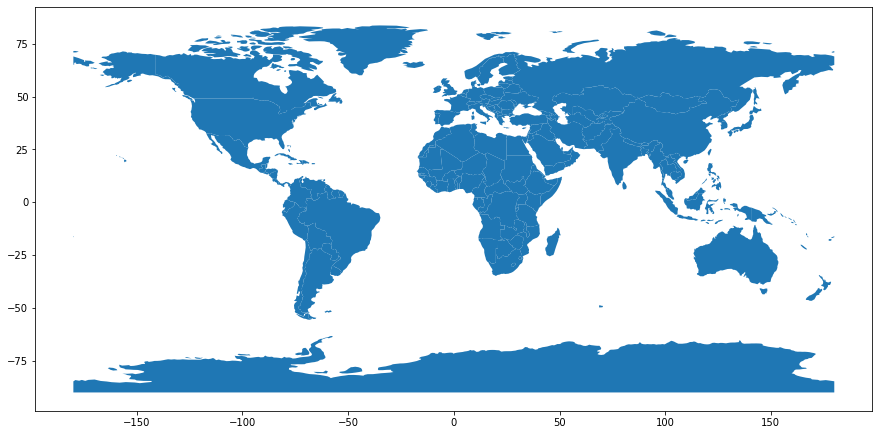

In [25]:
# Generate first plot
world.plot()

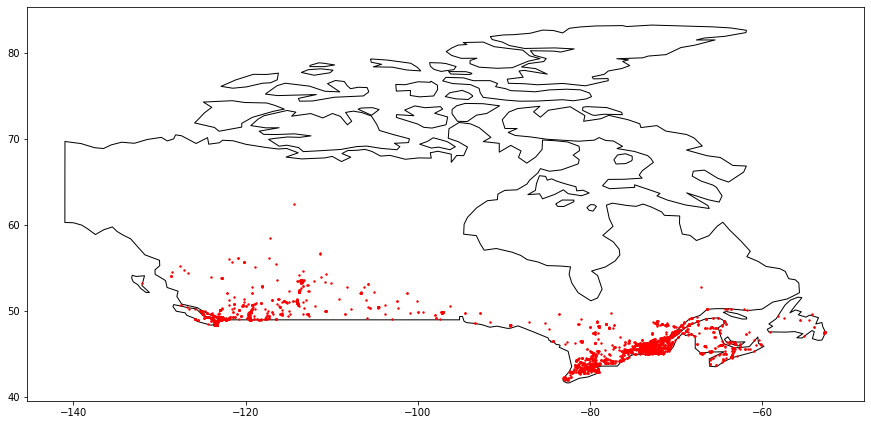

In [41]:
fig, ax = plt.subplots()
world[world.name == 'Canada'].plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, marker='o', color='red', markersize=2)
plt.savefig('elec.png', bbox_inches='tight')
#plt.close(fig)

In [27]:
# Adding Roads
# Data Source: http://www.diva-gis.org/gdata

In [29]:
road_df = gpd.read_file("CAN_roads.shx")
# road_df.head()
# road_df.plot()

In [50]:
# Adding Administrative Regions
# Data Source: http://www.diva-gis.org/gdata

In [58]:
region_df = gpd.read_file("CAN_adm1.shx")
# region_df.head()

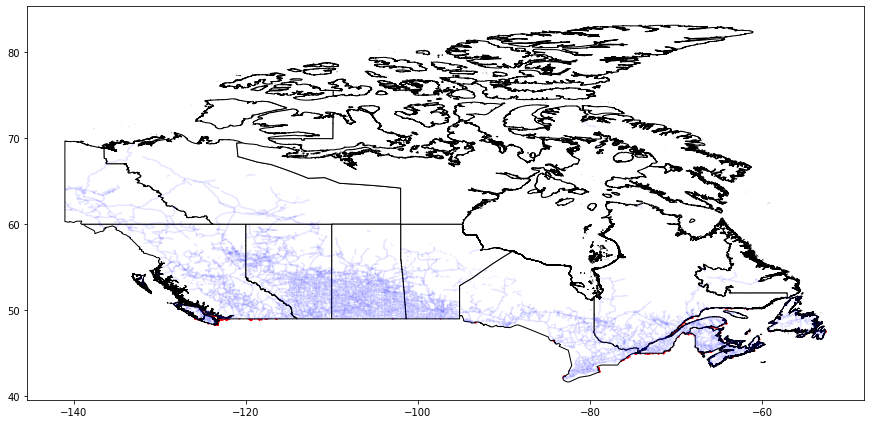

In [64]:
fig, ax = plt.subplots()
world[world.name == 'Canada'].plot(ax=ax, color='white')
gdf.plot(ax=ax, marker='o', color='red', markersize=1.5, alpha=0.9)
road_df.plot(ax=ax, color='blue', markersize=1, alpha=0.1)
region_df.plot(ax=ax, edgecolor='black', color='white', alpha=1)
plt.savefig('elec.png', bbox_inches='tight')
#plt.close(fig)